In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Inlezen van de dataset
data = pd.read_excel("C:/Users/20201954/Desktop/data/merged_data_MRI_isolation_forest.xlsx")
data.replace(',', '.', regex=True, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

Accuracy: 68.15%

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.67      0.85      0.75        26
           3       0.74      0.79      0.77        29
           4       0.50      0.48      0.49        21
           5       0.38      0.53      0.44        15
           6       0.78      0.72      0.75        29
           7       0.63      0.53      0.58        36
           8       0.69      0.83      0.75        35
           9       0.58      0.45      0.51        33
          10       0.77      0.79      0.78        29
          11       0.66      0.95      0.78        22
          12       0.71      0.43      0.53        28
          13       0.67      0.55      0.60        33
          14       1.00      0.46      0.63        28
          15       0.68      0.75      0.71        28
          16       0.74      0.77      0.75        30
          17       0.68      0.53      

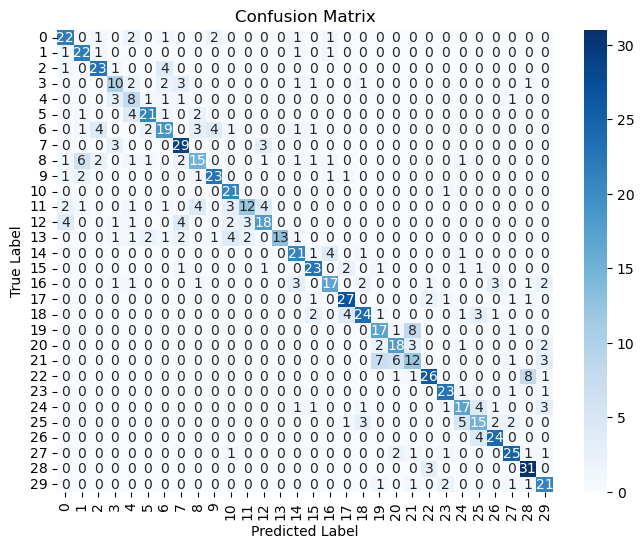

In [3]:
# Selecting features and target
X = data.drop(columns=['muscleID'])  # All columns except the muscle ID (which is the target)
y = data['muscleID']  # The target column

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()